In [98]:
# Import the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Plots will appear in the notebook
%matplotlib inline


### Thoracic Surgery Dataset - Preprocessing

In [74]:
# Load the cleaned data
df = pd.read_csv('data/clean-surgery-data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Diagnosis,FVC,FEV,PerfStat,Pain,Hae,Dys,Cough,Weak,TNM,T2Diab,MI,PAD,Smoker,Asthma,Age,Target
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60.0,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51.0,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59.0,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54.0,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73.0,1


### Exploratory Data Analysis
#### Age of Patients:

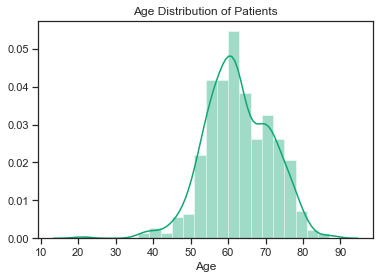

In [75]:
age_plot = sns.distplot(df.Age, color='#10a674');
age_plot.set(title="Age Distribution of Patients");

#### Tumor Size:

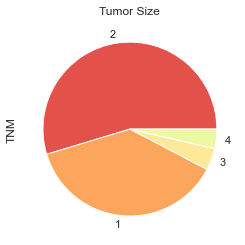

In [76]:
sns.set(style="ticks", palette='Spectral')
TMN_pie = df['TNM'].value_counts().plot(kind='pie');
TMN_pie.set(title="Tumor Size");

#### Patient Outcome by Tumor Size:

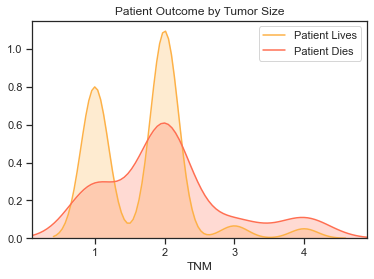

In [77]:
# Split df into survivors & non-survivors
survivors = df[df["Target"]==0]
non_survivors = df[df["Target"]==1]

y=survivors["TNM"]
z=non_survivors["TNM"]

np.random.seed(42)
sns.kdeplot(y, shade=True, color='#fdb147', label='Patient Lives');
sns.kdeplot(z, shade=True, color='#ff6f52', label='Patient Dies');

plt.title('Patient Outcome by Tumor Size')
plt.xlabel('TNM')
plt.xlim([0.1,4.9]);

#### Patient Outcome by Diagnosis:

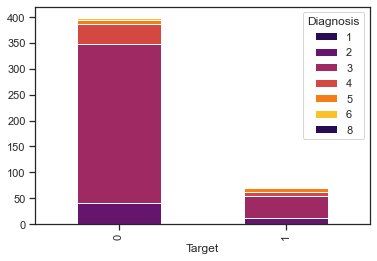

In [78]:
sns.set(style="ticks", palette='inferno')
# Patient Outcome by Diagnosis
df.groupby(['Target','Diagnosis']).size().unstack().plot(kind='bar',stacked=True);


#### Patient Outcome:

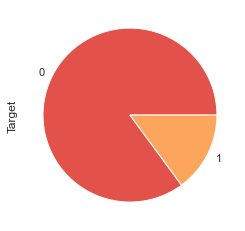

In [79]:

sns.set(style="ticks", palette='Spectral')
df['Target'].value_counts().plot(kind='pie');

#### Patients that Smoke:

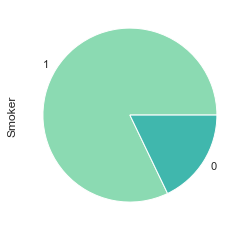

In [80]:
sns.set(style="ticks", palette='mako_r')
df['Smoker'].value_counts().plot(kind='pie');

#### Correlation Matrix:

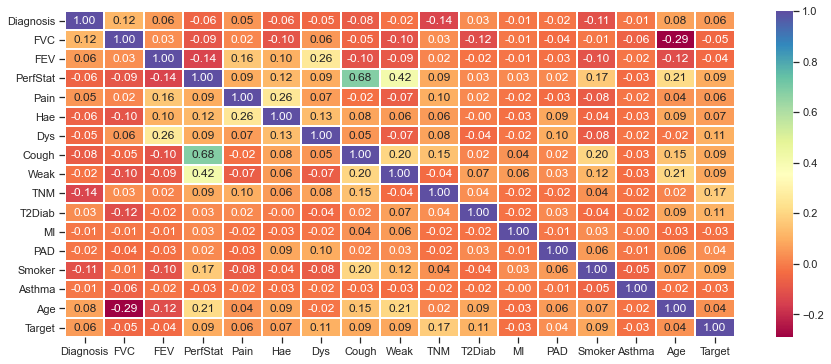

In [81]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot = True, cmap= 'Spectral', fmt='.2f', linewidths=1);


### Feature Selection

#### RFE (recursive feature elimination):

In [82]:
# Split into X & y
X = df.drop("Target", axis=1)
y = df["Target"]

# Split into train & test sets
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=y,
                                                    random_state = 42)

In [83]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(x_test, y_test)

c:\users\microage\pycharmprojects\sarahryanc964\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.851063829787234

In [84]:
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.851063829787234


#### Let's try KNN:

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.8404255319148937

In [86]:
knn.predict_proba(x_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4,

In [87]:
# This is the % chance of survival:
knn.predict_proba(x_test)[:,0]

array([1. , 1. , 0.6, 1. , 0.8, 0.6, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. ,
       1. , 0.6, 1. , 1. , 1. , 1. , 1. , 0.6, 1. , 0.6, 0.6, 1. , 0.8,
       1. , 0.8, 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8, 1. , 1. , 1. ,
       0.8, 0.8, 0.8, 0.8, 0.8, 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. ,
       0.4, 1. , 0.6, 0.6, 1. , 0.8, 1. , 1. , 0.8, 1. , 1. , 1. , 0.8,
       0.8, 1. , 0.8, 0.6, 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.6, 0.8,
       0.8, 0.8, 1. , 0.6, 0.6, 1. , 1. , 0.8, 0.6, 1. , 1. , 1. , 1. ,
       0.6, 0.8, 0.8])

In [88]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[80  0]
 [14  0]]


In [89]:
lr = LogisticRegression(max_iter=1000)
feature_selector = RFE(lr, 10)
feature_selector.fit(X_train, y_train)
feature_selector.ranking_

c:\users\microage\pycharmprojects\sarahryanc964\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([1, 1, 4, 3, 1, 1, 1, 5, 1, 1, 1, 7, 1, 1, 2, 6])

In [90]:
X_train.columns

Index(['Diagnosis', 'FVC', 'FEV', 'PerfStat', 'Pain', 'Hae', 'Dys', 'Cough',
       'Weak', 'TNM', 'T2Diab', 'MI', 'PAD', 'Smoker', 'Asthma', 'Age'],
      dtype='object')

In [91]:
best_features = ['Diagnosis', 'FVC', 'Pain','Hae', 'Dys', 'Weak', 'TNM',
                'T2Diab', 'PAD', 'Smoker']
X_selected = X_train[best_features]
x_test_selected = x_test[best_features]

In [92]:
lr_best_features = LogisticRegression()
lr_best_features.fit(X_selected,y_train)
print("Logistic Regression Score:", lr_best_features.score(x_test_selected, y_test))




Logistic Regression Score: 0.851063829787234


In [93]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_selected, y_train)
y_knn_pred = knn_2.predict(x_test_selected)
accuracy_score(y_test, y_knn_pred)


0.8191489361702128

In [96]:
cm = confusion_matrix(y_test, y_knn_pred)
print(cm)

[[77  3]
 [14  0]]


In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_selected, y_train)
y_pred_rfc = rfc.predict(x_test_selected)
accuracy_score(y_test, y_pred_rfc)



0.7872340425531915

[[73  7]
 [13  1]]


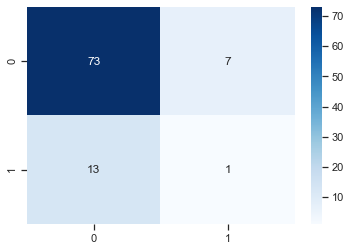

In [97]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.show()

In [99]:
print(classification_report(y_test, y_pred_rfc, zero_division=1))



              precision    recall  f1-score   support

           0       0.85      0.91      0.88        80
           1       0.12      0.07      0.09        14

    accuracy                           0.79        94
   macro avg       0.49      0.49      0.49        94
weighted avg       0.74      0.79      0.76        94



#### Selecting the Random Forest Classifier as the machine learning model. The model's hyperparameters will be further tuned in the data-prediction-model notebook.
